# Loading My Dataset

In [1]:
#Importing libraries which I will be using for model building
import numpy as np
import pandas as pd 
import datetime as dt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from datetime import timedelta

# **Importing Dataset**

In [2]:
#Reading my Dataset provided by HRC
data=pd.read_csv('H2HBABBA1593.csv')
#Viewing my data set
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140106408,WAL-M systems,2019-09-05 00:00:00,2019.0,2.960574e+09,2019-08-18,20190818,20190818,20190829.0,CAD,RV,1.0,NaN,163160.64,20190819.0,CA10,2.960574e+09,0
1,U001,0200592182,DECA trust,2019-02-01 00:00:00,2019.0,1.928697e+09,2019-01-28,20190128,20190128,20190208.0,USD,RV,1.0,NaN,1811.74,20190116.0,NAM4,1.928697e+09,0
2,CA02,0140106200,CIE CO co,2019-05-23 00:00:00,2019.0,2.960548e+09,2019-05-15,20190515,20190515,20190526.0,CAD,RV,1.0,NaN,7097.45,20190516.0,CA10,2.960548e+09,0
3,U001,0200707822,PUBLI systems,2019-12-05 00:00:00,2019.0,1.930178e+09,2019-11-20,20191121,20191120,20191205.0,USD,RV,1.0,NaN,76511.19,20191120.0,NAA8,1.930178e+09,0
4,U001,0200759878,SA llc,NaN,2020.0,1.930781e+09,2020-04-16,20200413,20200416,20200501.0,USD,RV,1.0,NaN,13603.02,20200416.0,NAH4,1.930781e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200712102,SUGAR corporation,2019-08-15 00:00:00,2019.0,1.929445e+09,2019-06-08,20190606,20190608,20190807.0,USD,RV,1.0,NaN,40450.00,20190608.0,NAVQ,1.929445e+09,0
49996,U001,0200148860,DOLLA systems,NaN,2020.0,1.930637e+09,2020-03-10,20200310,20200310,20200325.0,USD,RV,1.0,NaN,84599.73,20200310.0,NAA8,1.930637e+09,1
49997,U001,0200780383,MEIJ us,2019-06-17 00:00:00,2019.0,1.929413e+09,2019-05-31,20190601,20190531,20190615.0,USD,RV,1.0,NaN,45165.22,20190531.0,NAA8,1.929413e+09,0
49998,U001,0200769623,WAL-MAR corporation,2019-09-06 00:00:00,2019.0,1.929791e+09,2019-08-26,20190825,20190826,20190910.0,USD,RV,1.0,NaN,54914.06,20190826.0,NAH4,1.929791e+09,0


In [3]:
#Getting the shape of the my data set
data.shape

(50000, 19)

In [4]:
#Using .dtypes I am trying to get the data types of the columns
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [5]:
 #To get the count of non null values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# **Preprocessing**

#### Dropping Null Values

In [6]:
data.isnull().sum()  #Using this fuction it will give me how many null value are present in each column

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [7]:
# As we can see in the above data, columns:
#'area_business' contains only null vaules so we can drop it
data.drop('area_business',axis=1,inplace=True)

In [8]:
#Now let's deal with 'invoice_id' which contains only two null values
data.dropna(subset=['invoice_id'], inplace=True)
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

#### Dropping Constant Column 

In [9]:
#using nunique function we can see how many unique values are there is each columns
data.nunique()

business_code                 6
cust_number                1431
name_customer              4196
clear_date                  396
buisness_year                 2
doc_id                    48787
posting_date                505
document_create_date        506
document_create_date.1      505
due_in_date                 545
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         44390
baseline_create_date        507
cust_payment_terms           73
invoice_id                48787
isOpen                        2
dtype: int64

In [10]:
#As we can see from the above data
#columns['document type' and 'posting_id'] have 1 unique value that means they are constant columns
#So let's drop them
data.drop(['posting_id','document type'],axis=1, inplace=True)

# Date Time Conversion

In [11]:
data['clear_date']=pd.to_datetime(data['clear_date'])
data['posting_date']=pd.to_datetime(data['posting_date'])
data['document_create_date']=pd.to_datetime(data['document_create_date'],format="%Y%m%d",yearfirst=True)     # %Y-year    %m- month   %d-date 
data['document_create_date.1']=pd.to_datetime(data['document_create_date.1'],format="%Y%m%d",yearfirst=True)                                          # due in date was in float data type so first it was converted in int then i applied to_datetime to convert data type. 
data['due_in_date']=pd.to_datetime(data['due_in_date'],format="%Y%m%d",yearfirst=True)
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'],format="%Y%m%d",yearfirst=True)

In [12]:
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

# Dropping Duplicate columns

In [13]:
# transposing my dataset so that column becomes row
#And than finding duplicate columns in my dataset
data.T.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1     True
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [14]:
#Dropping document_create_date.1 column because it is same as posting date 
#Dropping invoice_id column because it is same as doc_id 
data.drop('document_create_date.1',axis=1, inplace=True) 
data.drop('invoice_id',axis=1, inplace=True)

In [15]:
#let's check how many values do business_code have
data.business_code.value_counts()

U001    45347
CA02     3857
U013      608
U002      167
U005       16
U007        3
Name: business_code, dtype: int64

In [16]:
#let's create the dummy variable for business_code
#It actually converts categorical variable into dummy variables
#I'm doing this before so that I dont have to keep creating it multiple times for main ,real ,train ,val and test.
dummy=pd.get_dummies(data['business_code'],drop_first=True)
dummy
data=pd.concat([data,dummy],axis=1)

# Spliting the dataset into main_train_set and real_test_set

In [17]:
# real_test_set will contain data where the 'clear_date' is null
main_train_set = data[data.clear_date.isnull()==False]
real_test_set = data[data.clear_date.isnull()]
main_train_set.shape, real_test_set.shape

((39998, 19), (10000, 19))

# Creating Target Column

In [18]:
#our target column will be (clear_date - due_in_date)
main_train_set['delay']=(main_train_set.clear_date-main_train_set.due_in_date).dt.days
main_train_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,U001,U002,U005,U007,U013,delay
0,CA02,0140106408,WAL-M systems,2019-09-05,2019.0,2.960574e+09,2019-08-18,2019-08-18,2019-08-29,CAD,163160.64,2019-08-19,CA10,0,0,0,0,0,0,7
1,U001,0200592182,DECA trust,2019-02-01,2019.0,1.928697e+09,2019-01-28,2019-01-28,2019-02-08,USD,1811.74,2019-01-16,NAM4,0,1,0,0,0,0,-7
2,CA02,0140106200,CIE CO co,2019-05-23,2019.0,2.960548e+09,2019-05-15,2019-05-15,2019-05-26,CAD,7097.45,2019-05-16,CA10,0,0,0,0,0,0,-3
3,U001,0200707822,PUBLI systems,2019-12-05,2019.0,1.930178e+09,2019-11-20,2019-11-21,2019-12-05,USD,76511.19,2019-11-20,NAA8,0,1,0,0,0,0,0
6,U001,0200424504,M corp,2019-09-16,2019.0,1.929735e+09,2019-08-13,2019-08-12,2019-09-15,USD,8672.94,2019-09-15,NATU,0,1,0,0,0,0,1


In [19]:
#Sorting the data set w.r.t posting_date
main_train_set.sort_values(by=['posting_date'],inplace=True, ascending=True)
#main_train_set.reset_index(drop=True, inplace=True)
main_train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,U001,U002,U005,U007,U013,delay
10960,U001,CCU013,KRAFT F corporation,2019-03-01,2019.0,1.928521e+09,2018-12-30,2018-12-31,2018-12-30,USD,3876.08,2018-12-30,NAX2,0,1,0,0,0,0,61
18181,CA02,0140105508,DOLLARA llc,2019-01-07,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-12,CAD,65457.00,2019-01-02,CA10,0,0,0,0,0,0,-5
39032,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,USD,26480.64,2018-12-30,NAH4,0,1,0,0,0,0,-5
36314,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,68730.85,2018-12-30,NAH4,0,1,0,0,0,0,-4
6751,U001,CCU013,KRAFT F systems,2019-03-01,2019.0,1.928517e+09,2018-12-30,2018-12-31,2018-12-30,USD,9685.62,2018-12-30,NAX2,0,1,0,0,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17433,U001,0200956366,RICH co,2020-03-17,2020.0,1.930562e+09,2020-02-26,2020-02-24,2020-03-12,USD,52315.56,2020-02-26,NAA8,0,1,0,0,0,0,5
12211,U001,CCU013,KRAFT F corp,2020-03-27,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-02-27,USD,9955.20,2020-02-27,NAX2,0,1,0,0,0,0,29
14400,U001,0200895843,US,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-03-13,USD,894.72,2020-02-27,NAA8,0,1,0,0,0,0,0
5125,CA02,0140106408,WAL-M foundation,2020-03-18,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,CAD,12740.33,2020-02-28,CA10,0,0,0,0,0,0,9


# Now let's split the main_train_set into train, val and test

In [20]:
# Converting the main_train_set into X and Y so that we can pass it onto train_test_split
X = main_train_set.drop('delay',axis=1)
Y = main_train_set['delay']

In [21]:
#Spliting main_train_set into train and temp
x_train,x_temp,y_train,y_temp=train_test_split(X, Y, test_size=0.3, shuffle=False, random_state=0 )

In [22]:
#Now spliting temp we can get val and test
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp, test_size=0.5, shuffle=False, random_state=0)

In [23]:
#let's check the shapes of train, val and test
x_train.shape , x_val.shape , x_test.shape

((27998, 19), (6000, 19), (6000, 19))

# Exploratory data analysis

<AxesSubplot:xlabel='delay', ylabel='Density'>

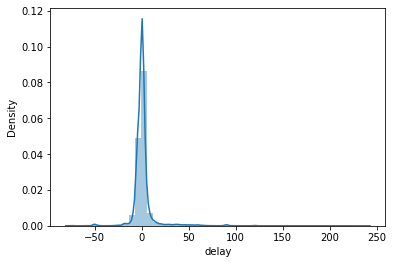

In [24]:
# Distribution of the target column 
# Symmetrical distribution
sns.distplot(y_train)

In [25]:
temp=(x_train.merge(y_train,on = x_train.index))  #Merging x_train and y_train for EDA
temp.head(3)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,...,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,U001,U002,U005,U007,U013,delay
0,10960,U001,CCU013,KRAFT F corporation,2019-03-01,2019.0,1.928521e+09,2018-12-30,2018-12-31,2018-12-30,...,3876.08,2018-12-30,NAX2,0,1,0,0,0,0,61
1,18181,CA02,0140105508,DOLLARA llc,2019-01-07,2019.0,2.960521e+09,2018-12-30,2018-12-30,2019-01-12,...,65457.00,2019-01-02,CA10,0,0,0,0,0,0,-5
2,39032,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,...,26480.64,2018-12-30,NAH4,0,1,0,0,0,0,-5


Text(0.5, 1.0, 'delay vs total_open_ammount')

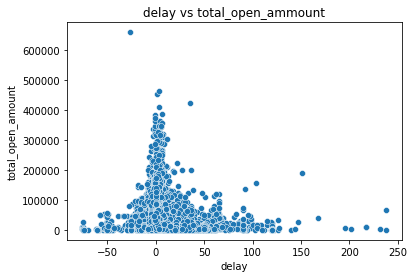

In [26]:
sns.scatterplot(data=temp, x="delay", y="total_open_amount")
plt.title('delay vs total_open_ammount')
#Here we can see greater the total_open_amount lesser the delay

<AxesSubplot:xlabel='business_code', ylabel='delay'>

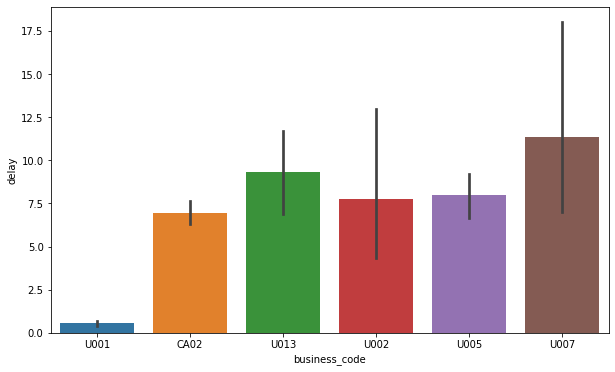

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x="business_code", y="delay",data=temp)
#U001 payment delay is very less then others

Text(0.5, 1.0, 'delay vs invoice_currency')

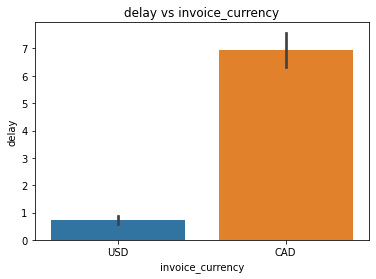

In [28]:
sns.barplot(x='invoice_currency', y='delay',data=temp)
plt.title("delay vs invoice_currency")
#Most playments are done in CAD

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

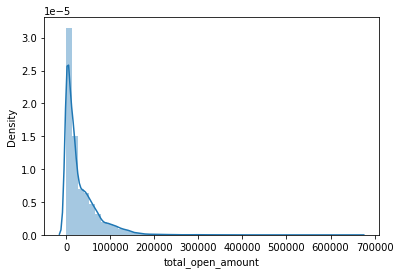

In [29]:
sns.distplot(x_train['total_open_amount'])
#Right skewed

In [30]:
#Doing log tranfromation so that the graph becomes Symmetrical distribution
def Transform(x):
    return np.log(x)

x_train['total_open_amount'] = x_train['total_open_amount'].apply(Transform)
x_val['total_open_amount'] = x_val['total_open_amount'].apply(Transform)
x_test['total_open_amount'] = x_test['total_open_amount'].apply(Transform)

# **Feature Engineering**

In [31]:
x_train.business_code.value_counts()

U001    25230
CA02     2236
U013      413
U002      107
U005        9
U007        3
Name: business_code, dtype: int64

In [32]:
#Grouping the dataset
map_business_code=temp.groupby("business_code")['delay'].mean().to_dict()
map_business_code

{'CA02': 6.940966010733453,
 'U001': 0.5515259611573523,
 'U002': 7.738317757009346,
 'U005': 8.0,
 'U007': 11.333333333333334,
 'U013': 9.326876513317192}

In [33]:
#Mapping in train, val and test
x_train['BC_mean_Delay']=x_train['business_code'].map(map_business_code)
x_val['BC_mean_Delay']=x_val['business_code'].map(map_business_code)
x_test['BC_mean_Delay']=x_test['business_code'].map(map_business_code)

In [34]:
# creating a function that will delete the column from train , val and test which are of no use
def drop_x(col):
    x_train.drop(col, axis=1, inplace=True)
    x_val.drop(col, axis=1, inplace=True)
    x_test.drop(col, axis=1, inplace=True)

In [35]:
drop_x('business_code')

In [36]:
x_train.cust_payment_terms.value_counts()

NAA8    11280
NAH4     7233
CA10     2172
NAC6      880
NAM4      760
        ...  
NAV2        1
NAUY        1
BR12        1
NA24        1
NAUX        1
Name: cust_payment_terms, Length: 62, dtype: int64

In [37]:
map_cust_payment_terms=main_train_set.groupby('cust_payment_terms')['delay'].mean().to_dict()
map_cust_payment_terms

{'B052': -12.333333333333334,
 'B112': 3.5,
 'BR12': 0.0,
 'BR56': 2.8181818181818183,
 'C106': 3.0,
 'CA10': 6.353344208809135,
 'CA30': -4.714285714285714,
 'CA60': 4.0,
 'CAB1': 7.4,
 'CAX2': 29.5,
 'NA10': 4.203966005665722,
 'NA24': -36.0,
 'NA25': -1.0,
 'NA31': -5.0,
 'NA32': -3.5858267716535432,
 'NA38': 4.075,
 'NA3B': -5.545454545454546,
 'NA3F': 2.5714285714285716,
 'NA84': -4.416666666666667,
 'NA8Q': 34.625,
 'NA9X': -4.916666666666667,
 'NAA8': 1.2996695966585625,
 'NAAW': -15.267080745341614,
 'NAAX': 0.044468546637744036,
 'NAB1': 7.7894736842105265,
 'NABG': -2.7,
 'NAC6': 0.8525096525096525,
 'NACB': 7.935483870967742,
 'NACE': 1.0,
 'NAD1': 0.39819587628865977,
 'NAD4': 0.7777777777777778,
 'NAD5': 8.583617747440274,
 'NAG2': 7.32157394843962,
 'NAGD': -14.297979797979798,
 'NAH4': -1.8744432862693072,
 'NAM1': 2.3333333333333335,
 'NAM2': -0.4725490196078431,
 'NAM3': 27.4,
 'NAM4': -7.338850174216028,
 'NANC': 3.0,
 'NATH': 1.0,
 'NATJ': 1.0,
 'NATK': 2.0,
 'NATL':

In [38]:
x_train['cust_PT_mean_delay']=x_train['cust_payment_terms'].map(map_cust_payment_terms)
x_val['cust_PT_mean_delay']=x_val['cust_payment_terms'].map(map_cust_payment_terms)
x_test['cust_PT_mean_delay']=x_test['cust_payment_terms'].map(map_cust_payment_terms)


In [39]:
drop_x('cust_payment_terms')

In [40]:
map_cust_number=main_train_set.groupby('cust_number')['delay'].mean().to_dict()
map_cust_number

{'0100000048': 44.0,
 '0100000051': 1.0,
 '0100000158': 35.2,
 '0100000217': -1.0,
 '0100000222': -4.7727272727272725,
 '0100000492': 8.0,
 '0100000533': -16.0,
 '0100000582': -5.0,
 '0100000843': 4.5,
 '0100000933': -5.333333333333333,
 '0100001196': 3.0142857142857142,
 '0100001222': 0.0,
 '0100001452': 0.0,
 '0100003940': 1.0,
 '0100004335': 7.0,
 '0100004536': -4.5,
 '0100004744': 0.5,
 '0100005721': -6.0,
 '0100006176': 48.5,
 '0100006311': -1.25,
 '0100006823': -2.0,
 '0100006871': -2.0,
 '0100006887': -7.0,
 '0100007171': 16.0,
 '0100007796': 1.6923076923076923,
 '0100007916': -23.0,
 '0100008001': -0.25,
 '0100008347': 2.5,
 '0100009189': -6.0,
 '0100009866': 6.5,
 '0100009932': 2.1,
 '0100010082': -29.5,
 '0100010265': 3.0,
 '0100010669': -1.25,
 '0100010865': 5.0,
 '0100011023': -1.0,
 '0100011799': 0.75,
 '0100011895': -0.5,
 '0100011958': 3.888888888888889,
 '0100012023': -36.0,
 '0100012482': -3.0,
 '0100012638': 4.416666666666667,
 '0100012698': 9.2,
 '0100012836': 3.0,
 

In [41]:
x_train['CN_mean_delay']=x_train['cust_number'].map(map_cust_number)
x_val['CN_mean_delay']=x_val['cust_number'].map(map_cust_number)
x_test['CN_mean_delay']=x_test['cust_number'].map(map_cust_number)

In [42]:
drop_x('cust_number')

In [43]:
map_name_customer=main_train_set.groupby('name_customer')['delay'].mean().to_dict()
map_name_customer

{'10167 co': 1.0,
 '11-17  systems': 33.0,
 '113712 CA foundation': 2.0,
 '17135 ': -3.0,
 '17135 corp': 10.0,
 '17135 corporation': -3.0,
 '17135 in': 11.0,
 '17135 llc': 4.0,
 '17135 us': 6.0,
 '236008 in': -4.0,
 '7 - E associates': -10.0,
 '7 - E corp': -10.0,
 '7 ELEVE foundation': 1.0,
 '9043- corp': -10.0,
 '99 CE ': 1.5,
 '99 CE associates': 5.5,
 '99 CE co': 3.0,
 '99 CE corp': 23.5,
 '99 CE corporation': 2.0,
 '99 CE foundation': 3.4,
 '99 CE in': 1.3333333333333333,
 '99 CE systems': 3.0,
 '99 CE trust': -11.666666666666666,
 '99 CE us': 3.0,
 '99C  trust': 29.0,
 'A &  corp': 0.0,
 'A & W F ': 2.6666666666666665,
 'A & W F associates': 3.3333333333333335,
 'A & W F co': -0.6,
 'A & W F corp': 0.0,
 'A & W F corporation': 9.0,
 'A & W F foundation': 0.0,
 'A & W F in': 3.3333333333333335,
 'A & W F systems': 1.0,
 'A & W F trust': -1.5,
 'A & W F us': 0.0,
 'A1 BAG systems': 39.0,
 'ACC D systems': 8.0,
 'ACE  us': 1.0,
 'ADEL ': 0.0,
 'AFFI ': -7.333333333333333,
 'AFFI ass

In [44]:
x_train['NC_mean_delay']=x_train['name_customer'].map(map_name_customer)
x_val['NC_mean_delay']=x_val['name_customer'].map(map_name_customer)
x_test['NC_mean_delay']=x_test['name_customer'].map(map_name_customer)

In [45]:
drop_x('name_customer')

In [46]:
#Spliting 'document_create_date' date to year, month, day
#Might be helpful in feature eng
x_train['year'] = x_train['document_create_date'].dt.year
x_train['month'] = x_train['document_create_date'].dt.month
x_train['day'] = x_train['document_create_date'].dt.day

x_val['year'] = x_val['document_create_date'].dt.year
x_val['month'] = x_val['document_create_date'].dt.month
x_val['day'] = x_val['document_create_date'].dt.day

x_test['year'] = x_test['document_create_date'].dt.year
x_test['month'] = x_test['document_create_date'].dt.month
x_test['day'] = x_test['document_create_date'].dt.day

<AxesSubplot:title={'center':'Features'}>

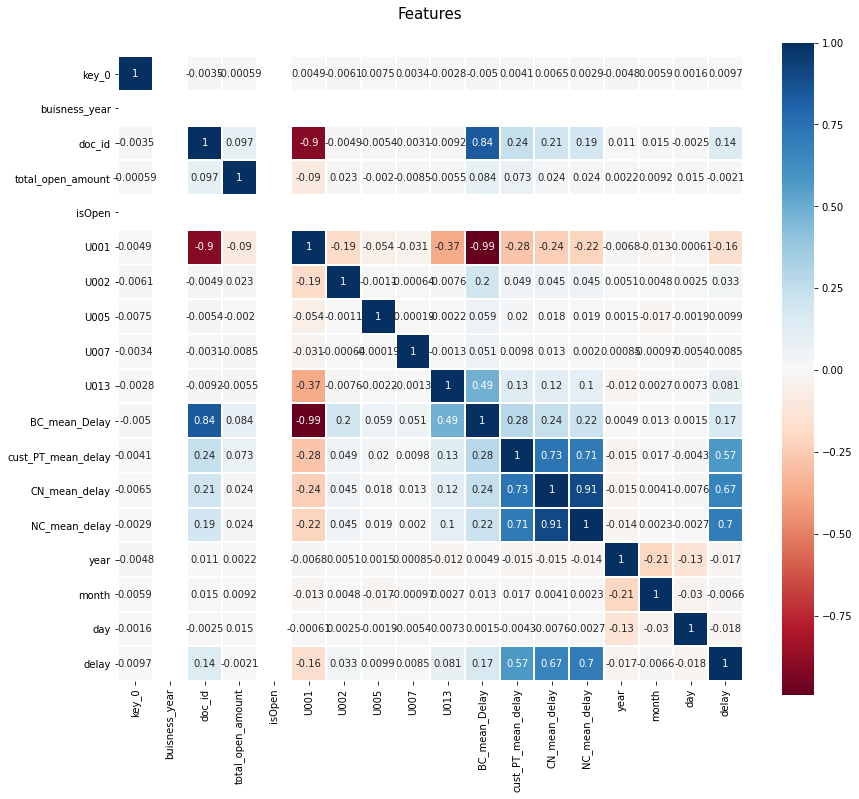

In [47]:
#Doing HeatMap to see a clear visualization of correlation between all the columns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Feature Selection

In [48]:
#Droping all unwanted columns which will not help us in prediction of delay
drop_x(['buisness_year','isOpen','clear_date','document_create_date','posting_date','due_in_date','baseline_create_date','invoice_currency'])

In [49]:
#cheacking null/nan
x_train.isnull().sum()

doc_id                0
total_open_amount     0
U001                  0
U002                  0
U005                  0
U007                  0
U013                  0
BC_mean_Delay         0
cust_PT_mean_delay    0
CN_mean_delay         0
NC_mean_delay         0
year                  0
month                 0
day                   0
dtype: int64

In [50]:
#droping more columns
drop_x(['doc_id','U001','year','total_open_amount','month','day'])

In [51]:
x_train.shape,x_val.shape,x_test.shape

((27998, 8), (6000, 8), (6000, 8))

In [52]:
#My final featues columns that will help me to predict the delay
x_train.head(1)

,U002,U005,U007,U013,BC_mean_Delay,cust_PT_mean_delay,CN_mean_delay,NC_mean_delay
10960,0,0,0,0,0.551526,44.698795,44.017391,41.609756


In [53]:
x_train.dtypes

U002                    uint8
U005                    uint8
U007                    uint8
U013                    uint8
BC_mean_Delay         float64
cust_PT_mean_delay    float64
CN_mean_delay         float64
NC_mean_delay         float64
dtype: object

# Trying Different types of Regression

In [54]:
# Creating List to store the scores of Different types of Regression
MSE_Score = []
R2_Score = []
Algorithm = []

In [55]:
#Random Forest Regressor
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train, y_train)
# Predicting the val Set Results
predicted = clf.predict(x_val)
# Appending the Scores For Visualisation
MSE_Score.append(mean_squared_error(y_val, predicted,squared=False))
R2_Score.append(r2_score(y_val, predicted))


In [56]:
#Linear Regression
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train, y_train)
# Predicting the val Set Results
predicted = clf.predict(x_val)
# Appending the Scores For Visualisation
MSE_Score.append(mean_squared_error(y_val, predicted,squared=False))
R2_Score.append(r2_score(y_val, predicted))

In [57]:
# Decision Tree
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(x_train, y_train)
# Predicting the val Set Results
predicted = clf.predict(x_val)
# Appending the Scores For Visualisation
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [58]:
#Comparing all the scores
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,Random Forest Regressor,5.389854,0.438743
1,Linear Regression,5.079873,0.501445
2,Decision Tree Regressor,27.735314,0.464153


In [59]:
#I selected LinearRegression 
Regression = LinearRegression()
Regression.fit(x_train, y_train)

predicted1 = Regression.predict(x_train)

r2_score(y_train, predicted1)*100

50.46755095471224

In [60]:
# Predicting the val Set Results
predicted2 = Regression.predict(x_val)
r2_score(y_val, predicted2)*100

50.14447365980107

In [61]:
# Predicting the Test Set Results
predicted2 = Regression.predict(x_test)
# Appending the Scores For Visualisation at a Later Part
r2_score(y_test, predicted2)*100

57.391623128527684

# Mapping features to real_test_set and Testing

In [62]:
#Making a copy for final clear_date prediction
final_set=real_test_set.copy(deep = True)

In [63]:
#again doing feature eng, feature selection, and preprocessing in real_test_set
real_test_set['cust_PT_mean_delay']=real_test_set['cust_payment_terms'].map(map_cust_payment_terms)
real_test_set['NC_mean_delay']=real_test_set['name_customer'].map(map_name_customer)
real_test_set['CN_mean_delay']=real_test_set['cust_number'].map(map_cust_number)
real_test_set['BC_mean_Delay']=real_test_set['business_code'].map(map_business_code)

In [64]:
real_test_set.isnull().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
doc_id                      0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
isOpen                      0
U001                        0
U002                        0
U005                        0
U007                        0
U013                        0
cust_PT_mean_delay         11
NC_mean_delay             331
CN_mean_delay              97
BC_mean_Delay               0
dtype: int64

In [65]:
#droping
real_test_set.dropna(subset=['cust_PT_mean_delay','CN_mean_delay','NC_mean_delay'], inplace=True)

In [66]:
real_test_set.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9621
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
isOpen                     0
U001                       0
U002                       0
U005                       0
U007                       0
U013                       0
cust_PT_mean_delay         0
NC_mean_delay              0
CN_mean_delay              0
BC_mean_Delay              0
dtype: int64

In [67]:
real_test_set.head(1)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,isOpen,U001,U002,U005,U007,U013,cust_PT_mean_delay,NC_mean_delay,CN_mean_delay,BC_mean_Delay
4,U001,0200759878,SA llc,NaT,2020.0,1.930781e+09,2020-04-16,2020-04-13,2020-05-01,USD,...,1,1,0,0,0,0,-1.874443,0.226562,1.056711,0.551526


In [68]:
#droping unwanted
real_test_set.drop(['cust_number','business_code','isOpen','buisness_year','name_customer','clear_date','document_create_date','posting_date','due_in_date','baseline_create_date','invoice_currency',],axis=1,inplace=True)

In [69]:
#droping unwanted
real_test_set.drop(['doc_id','U001','total_open_amount','cust_payment_terms'],axis=1,inplace=True)

In [70]:
real_test_set

,U002,U005,U007,U013,cust_PT_mean_delay,NC_mean_delay,CN_mean_delay,BC_mean_Delay
4,0,0,0,0,-1.874443,0.226562,1.056711,0.551526
5,0,0,0,0,1.299670,2.472973,1.976040,0.551526
17,0,0,0,0,1.299670,0.810345,0.833333,0.551526
19,0,0,0,0,-1.874443,-2.125000,-2.217207,0.551526
29,0,0,0,0,0.852510,-0.897959,-0.245690,0.551526
...,...,...,...,...,...,...,...,...
49944,0,0,0,0,6.353344,2.555556,1.640097,6.940966
49957,0,0,0,0,1.299670,0.642857,0.523256,0.551526
49976,0,0,0,0,1.299670,-0.352941,0.295302,0.551526
49984,0,0,0,0,1.299670,7.500000,3.333333,0.551526


# Predicting on real_test_set 

In [71]:

Regress = LinearRegression()
Regress.fit(x_train, y_train)

# Predicting the Test Set Results
pred_t = Regress.predict(real_test_set)


In [72]:
np.round(pred_t)

array([ 1.,  1.,  1., ...,  0.,  3., -2.])

In [73]:
#Changing type to int
pred_t=pred_t.astype(int)

In [74]:
print(pred_t)

[ 0  1  0 ...  0  2 -1]


In [75]:
#real_test_set.reset_index(drop=True)

In [76]:
#adding Delay coloumn in real_test_set
real_test_set['Delay']=pred_t

In [77]:
real_test_set

,U002,U005,U007,U013,cust_PT_mean_delay,NC_mean_delay,CN_mean_delay,BC_mean_Delay,Delay
4,0,0,0,0,-1.874443,0.226562,1.056711,0.551526,0
5,0,0,0,0,1.299670,2.472973,1.976040,0.551526,1
17,0,0,0,0,1.299670,0.810345,0.833333,0.551526,0
19,0,0,0,0,-1.874443,-2.125000,-2.217207,0.551526,0
29,0,0,0,0,0.852510,-0.897959,-0.245690,0.551526,0
...,...,...,...,...,...,...,...,...,...
49944,0,0,0,0,6.353344,2.555556,1.640097,6.940966,5
49957,0,0,0,0,1.299670,0.642857,0.523256,0.551526,0
49976,0,0,0,0,1.299670,-0.352941,0.295302,0.551526,0
49984,0,0,0,0,1.299670,7.500000,3.333333,0.551526,2


In [78]:
#Now time to do everything and test on final_set
final_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,U001,U002,U005,U007,U013
4,U001,0200759878,SA llc,NaT,2020.0,1.930781e+09,2020-04-16,2020-04-13,2020-05-01,USD,13603.02,2020-04-16,NAH4,1,1,0,0,0,0
5,U001,0200744019,TARG trust,NaT,2020.0,1.930874e+09,2020-05-07,2020-05-07,2020-05-22,USD,4668.40,2020-05-07,NAA8,1,1,0,0,0,0
17,U001,200793513,KROGER associates,NaT,2020.0,1.930846e+09,2020-05-06,2020-05-02,2020-05-21,USD,16300.46,2020-05-06,NAA8,1,1,0,0,0,0
19,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930712e+09,2020-03-28,2020-03-27,2020-04-12,USD,55378.54,2020-03-28,NAH4,1,1,0,0,0,0
29,U001,0200762301,C&S WH,NaT,2020.0,1.930838e+09,2020-04-29,2020-04-29,2020-05-14,USD,15377.05,2020-04-29,NAC6,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49944,CA02,0140104409,LOB us,NaT,2020.0,2.960633e+09,2020-05-05,2020-05-05,2020-05-23,CAD,102176.32,2020-05-13,CA10,1,0,0,0,0,0
49957,U001,0200750051,ALBER us,NaT,2020.0,1.930705e+09,2020-03-27,2020-03-26,2020-04-11,USD,42172.88,2020-03-27,NAA8,1,1,0,0,0,0
49976,U001,0200782669,SYGMA systems,NaT,2020.0,1.930701e+09,2020-03-26,2020-03-25,2020-04-10,USD,8523.30,2020-03-26,NAA8,1,1,0,0,0,0
49984,U001,0100030443,GLACIE corporation,NaT,2020.0,1.930771e+09,2020-04-07,2020-04-09,2020-04-22,USD,5152.79,2020-04-07,NAA8,1,1,0,0,0,0


In [79]:
#Doing mapping and dropping columns
final_set['cust_PT_mean_delay']=final_set['cust_payment_terms'].map(map_cust_payment_terms)
final_set['NC_mean_delay']=final_set['name_customer'].map(map_name_customer)
final_set['CN_mean_delay']=final_set['cust_number'].map(map_cust_number)
final_set['BC_mean_Delay']=final_set['business_code'].map(map_business_code)

In [80]:
#dropping
final_set.dropna(subset=['cust_PT_mean_delay','CN_mean_delay','NC_mean_delay'], inplace=True)


In [81]:
#Adding Delay coloumn in final_set
final_set['Delay']=pred_t

In [82]:
# Aging Bucket
def  Aging_Bucket(df):
    if df['Delay']<=15:
        return "0-15 Days Delay"
    elif 15 < df['Delay'] < 31:
        return '16-30 Days Delay'
    elif 30 < df['Delay'] < 46:
        return '31-45 Days Delay'
    elif 45 < df['Delay'] < 61:
        return '46-60 Days Delay'
    else:
        return 'Delay greater than 60 days'

final_set['Aging Bucket'] =final_set.apply(Aging_Bucket, axis=1)

In [83]:
#Viewing Aging Bucket
final_set['Aging Bucket'].head()

4     0-15 Days Delay
5     0-15 Days Delay
17    0-15 Days Delay
19    0-15 Days Delay
29    0-15 Days Delay
Name: Aging Bucket, dtype: object

In [84]:
#Cheacking nulls
final_set.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9621
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
isOpen                     0
U001                       0
U002                       0
U005                       0
U007                       0
U013                       0
cust_PT_mean_delay         0
NC_mean_delay              0
CN_mean_delay              0
BC_mean_Delay              0
Delay                      0
Aging Bucket               0
dtype: int64

In [85]:
#lets take out the predicted_payment_date using this CD function 
def CD(df):
  return df['due_in_date'] + timedelta(days=df['Delay'])

final_set['predicted_payment_date']=final_set.apply(CD, axis=1)

In [86]:
#viewing my final_set with all prediction done by my model
final_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,U005,U007,U013,cust_PT_mean_delay,NC_mean_delay,CN_mean_delay,BC_mean_Delay,Delay,Aging Bucket,predicted_payment _date
4,U001,0200759878,SA llc,NaT,2020.0,1.930781e+09,2020-04-16,2020-04-13,2020-05-01,USD,...,0,0,0,-1.874443,0.226562,1.056711,0.551526,0,0-15 Days Delay,2020-05-01
5,U001,0200744019,TARG trust,NaT,2020.0,1.930874e+09,2020-05-07,2020-05-07,2020-05-22,USD,...,0,0,0,1.299670,2.472973,1.976040,0.551526,1,0-15 Days Delay,2020-05-23
17,U001,200793513,KROGER associates,NaT,2020.0,1.930846e+09,2020-05-06,2020-05-02,2020-05-21,USD,...,0,0,0,1.299670,0.810345,0.833333,0.551526,0,0-15 Days Delay,2020-05-21
19,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930712e+09,2020-03-28,2020-03-27,2020-04-12,USD,...,0,0,0,-1.874443,-2.125000,-2.217207,0.551526,0,0-15 Days Delay,2020-04-12
29,U001,0200762301,C&S WH,NaT,2020.0,1.930838e+09,2020-04-29,2020-04-29,2020-05-14,USD,...,0,0,0,0.852510,-0.897959,-0.245690,0.551526,0,0-15 Days Delay,2020-05-14


In [87]:
final_set.to_csv("predicted_final_set.csv")